# Install dependencies

In [1]:
# Clone Github repository of YOLOV5 from ultralutics
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [9]:
# Install requirements
!pip install -r requirements.txt

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 799.0 kB/s eta 0:00:00
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ---------------------------------------- 40.4/40.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
   ----------------------- ---------------- 122.9/207.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 207.3/207.3 kB 3.1 MB/s eta 0:00:00
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.5 MB 14.1 MB/s eta 0:00:01
   --- -----------------------------

### Import libraries

In [1]:
import os
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import uuid 

# Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\warfa/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-9 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

100%|██████████| 14.1M/14.1M [00:03<00:00, 4.74MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [11]:
img = 'https://ultralytics.com/images/zidane.jpg' # test on image

In [12]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1690.0ms pre-process, 128.1ms inference, 86.0ms NMS per image at shape (1, 3, 384, 640)


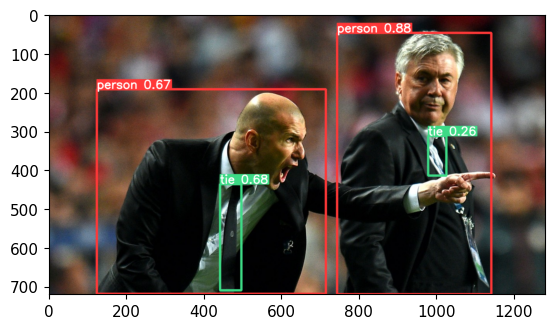

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
np.array(results.render()).shape

(1, 720, 1280, 3)

# Real Time Detections

In [24]:
def videoCapture(model):
    cap = cv2.VideoCapture(0) # capture video from device
    while cap.isOpened():
        ret,frame = cap.read()
        results = model(frame)
        
        cv2.imshow('YOLO',np.squeeze(results.render())) # show image with predicted boxes
    
        if cv2.waitKey(10) & 0xFF == ord('q'): # quit if q is pressed
            break
    
    cap.release()
    cv2.destroyAllWindows()

# FineTune

## Collect Data

In [33]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['fck','help'] #define new classes
number_imgs = 20 # define number of images that should be taken

In [34]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    for img_num in range(number_imgs):
        print(f"Collecting images for {label}, image number {img_num} ")

        ret, frame = cap.read()
    
        imgname = os.path.join(IMAGES_PATH, label+'.'+ str(uuid.uuid1()) + '.jpg') #assign name to image
        #save image
        cv2.imwrite(imgname,frame) 
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
cap.release()
cv2.destroyAllWindows()

In [36]:
# git repository for image labeling software
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.
Cloning into 'labelImg'...
error: Untracked working tree file '.github/no-response.yml' would be overwritten by merge.
fatal: unable to checkout working tree
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'



In [37]:
#install it
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB 445.2 kB/s eta 0:00:16
    --------------------------------------- 0.1/6.8 MB 939.4 kB/s eta 0:00:08
   - -------------------------------------- 0.2/6.8 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.2/6.8 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.3/6.8 MB 1.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/6.8 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.6/6.8 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/6.8 MB 1.6 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/6.8 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/6.8 MB 2.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.2/6.8 MB 2.3 MB/s eta 0:00:03
   -------- ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-contrib-nbextensions 0.7.0 requires ipython-genutils, which is not installed.


#  Train model

In [40]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-296-gae4ef3b2 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

# Load Model

In [44]:
model = torch.hub.load('ultralytics/yolov5',"custom",path='yolov5/runs/train/exp3/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\warfa/.cache\torch\hub\master.zip
YOLOv5  2024-4-9 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [46]:
#test real time
videoCapture(model)

In [47]:
# Full tutorial
#https://www.youtube.com/watch?v=tFNJGim3FXw
